# **Maximizing Revenue with Data: 2019 Sales Trends and Product Performance**


### **Business Understanding**


#### **Problem Satement**

A client assigned by getINNOtized, has collected transactional data for the year 2019 but hasn't been able to effectively use this data to improve sales or operational efficiency. They need insights into sales performance, seasonal trends, product popularity, and city-level sales to help drive more sales and streamline operations.

#### **Goal and Objectives**

The main goal is to deliver a comprehensive business intelligence (BI) solution that helps the client:

- Identify trends and seasonality in sales.
- Analyze product performance to discover best- and worst-selling items.
- Compare sales across different time periods (monthly, weekly) for actionable insights.
- Analyze geographical sales performance to identify cities with higher demand.
- Segment products based on price and analyze their contribution to total sales.

#### **Stakeholders**

- Primary Stakeholders: Management team looking for sales and operational insights.
- Secondary Stakeholders: Sales and marketing teams who can use the insights for future campaigns.
- Analysts: Those responsible for deriving and communicating actionable insights.
- Operations Team: Can leverage insights for improving efficiency in delivering products to high-demand areas.

#### **Key Metrics and Success**

- Total Sales Revenue: Monthly and yearly revenue.
- Seasonality Metrics: Monthly/quarterly sales trends.
- Product Performance: Revenue and quantity sold by product.
- Geographic Metrics: Sales distribution by city.
- Product Category Performance: Revenue and quantity sold by product category (high-level vs. basic).
- Operational Efficiency: Timeliness of reporting, ease of extracting actionable insights, and ability to identify growth opportunities

#### **Features**

1. Order ID: Identifies each sales transaction.
2. Product: Specifies the product sold.
3. Quantity Ordered: Represents the number of units ordered.
4. Price Each: Indicates the price per unit of the product.
5. Order Date: The date when the order was placed.
6. Purchase Address: The shipping or billing address associated with the order.

#### **Methodology**

The project follows the CRISP-DM (Cross Industry Standard Process for Data Mining) methodology, structured as:

- Business Understanding: Define objectives and requirements from the client to drive sales and improve efficiency
- Data Understanding: Collect and explore the dataset, which includes sales data for 2019 across various columns
- Data Preparation: Clean and transform the data, integrating sources from CSV files and a remote database
- Modelling: Apply appropriate data analysis techniques to uncover insights.
- Evaluation: Assess the results against business objectives to ensure they meet the client’s needs
- Deployment: Develop and deploy a Power BI dashboard to visualize the insights

#### **Analytical Questions**

1. How much money did we make this year?

2. Can we identify any seasonality in the sales?

3. What are our best and worst-selling products?

4. How do sales compare to previous months or weeks?

5. Which cities are our products delivered to most?

6. How do product categories compare in revenue generated and quantities ordered?

#### **Scope and Constraints**

Scope:

- Analysis will focus on the sales data for 2019, broken down by months, weeks, and product categories.
- Sales data for January to June will be extracted from CSV files, and data for July to December will be pulled from the database.
- The analysis will also involve comparison between high-level and basic products based on unit price thresholds.

Constraints:

- Data integration: Combining two different data sources (CSV and database).
- Time constraints for accessing, cleaning, and preparing the data.
- Potential inconsistencies in data formatting between the first and second halves of the year.

#### **Extra Information**

- The products with a unit price greater than $99.99 will be categorized as high-level products, and those below or equal to $99.99 will be considered basic products. This categorization will be critical for revenue comparisons across product types.
- To answer the questions efficiently, a blend of SQL for database querying and Python/Excel for data analysis and visualization will be required.
- This project must be completed in two weeks


### **Data Understanding**


#### **Importation of libraries**


In [1]:
# **Importation of libraries**
 #Data manipulation and analysis
import pandas as pd
import numpy as np
from itertools import product
import polars as pl
import pyarrow as pa
import os 

import warnings

warnings.filterwarnings('ignore')
 
# Database connectivity
import pyodbc
 
# Database ORM
from sqlalchemy import create_engine
 
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Machine learning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from scipy.stats import mannwhitneyu



In [2]:
!where python


c:\Users\USER\Desktop\Sales-Trends-2019\virtual\Scripts\python.exe
C:\Users\USER\AppData\Local\Microsoft\WindowsApps\python.exe


#### **Data Loading**


In [3]:
# Loading Data from January to June
# List of CSV files (January to June)
csv_files = ['Sales_January_2019.csv', 'Sales_February_2019.csv', 'Sales_March_2019.csv',
             'Sales_April_2019.csv', 'Sales_May_2019.csv', 'Sales_June_2019.csv']

# Define the folder path
folder_path = r'C:\Users\USER\Desktop\Sales-Trends-2019\data'

# Initialize an empty list to store DataFrames
df_firsthalf = []

# Loop over the CSV files to load each into a DataFrame and append to list
for file in csv_files:
    # Correctly join the folder path and file name
    file_path = os.path.join(folder_path, file)

    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Append the DataFrame to the list
    df_firsthalf.append(df)

    # Print the head of the DataFrame for each month for verification
    print(f"Head of {file.split('_')[1]} Data:")
    print(df.head())
    print("\n")  # Add a line break for readability

# Now firsthalf_dataframes contains all the DataFrames for January to June

Head of January Data:
  Order ID                   Product Quantity Ordered Price Each  \
0   141234                    iPhone                1        700   
1   141235  Lightning Charging Cable                1      14.95   
2   141236          Wired Headphones                2      11.99   
3   141237          27in FHD Monitor                1     149.99   
4   141238          Wired Headphones                1      11.99   

       Order Date                       Purchase Address  
0  01/22/19 21:25        944 Walnut St, Boston, MA 02215  
1  01/28/19 14:15       185 Maple St, Portland, OR 97035  
2  01/17/19 13:33  538 Adams St, San Francisco, CA 94016  
3  01/05/19 20:33     738 10th St, Los Angeles, CA 90001  
4  01/25/19 11:59          387 10th St, Austin, TX 73301  


Head of February Data:
  Order ID                   Product Quantity Ordered Price Each  \
0   150502                    iPhone                1        700   
1   150503     AA Batteries (4-pack)                1 

In [4]:
# Loading Data from July to December

# Define the connection string
connection_string = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=dap-projects-database.database.windows.net;'
    'DATABASE=dapDB;'
    'UID=capstone;'
    'PWD=Z7x@8pM$2w;'
)

# Connect to the SQL Server database
try:
    connection = pyodbc.connect(connection_string)
    print("Connection to dapDB successful!")
except Exception as e:
    print(f"Error connecting to the database: {e}")
    exit()

# List of table names
table_names = ['Sales_July_2019', 'Sales_August_2019', 'Sales_September_2019',
               'Sales_October_2019', 'Sales_November_2019', 'Sales_December_2019']

# Create an empty list to store DataFrames
df_secondhalf = []

# Loop through each table and fetch data
for table in table_names:
    print(f"Fetching data from {table}...")
    # SQL query to select all data from the table
    query = f"SELECT * FROM {table}"

    # Fetch the data into a Pandas DataFrame
    df = pd.read_sql(query, connection)

    # Display the first few rows
    print(df.head())

    # Save the data to a CSV file
    csv_filename = f"{table}.csv"
    df.to_csv(csv_filename, index=False)
    print(f"Data from {table} saved to {csv_filename}")

    # Append the DataFrame to the list
    df_secondhalf.append(df)


# Close the connection
connection.close()

Connection to dapDB successful!
Fetching data from Sales_July_2019...
   Order_ID                   Product  Quantity_Ordered  Price_Each  \
0  222910.0  Apple Airpods Headphones               1.0      150.00   
1  222911.0             Flatscreen TV               1.0      300.00   
2  222912.0     AA Batteries (4-pack)               1.0        3.84   
3  222913.0     AA Batteries (4-pack)               1.0        3.84   
4  222914.0    AAA Batteries (4-pack)               5.0        2.99   

           Order_Date                  Purchase_Address  
0 2026-07-19 16:51:00   389 South St, Atlanta, GA 30301  
1 2005-07-19 08:55:00     590 4th St, Seattle, WA 98101  
2 2029-07-19 12:41:00    861 Hill St, Atlanta, GA 30301  
3 2028-07-19 10:15:00   190 Ridge St, Atlanta, GA 30301  
4 2031-07-19 02:13:00  824 Forest St, Seattle, WA 98101  
Data from Sales_July_2019 saved to Sales_July_2019.csv
Fetching data from Sales_August_2019...
   Order_ID                     Product  Quantity_Ordered  P

#### **Insights**

- The datasets retrieved from the one drive are placed in the variable firsthalf and the datasets retrieved from the remote database are in the vaaible secondhalf

- Column headings accross both datasets are similar but not the same eg. Order ID and Order_ID

- Order_Date column for the secondhalf dataset needs thorough cleaning.

- There are variety of products which affect significant price range in the data, from items priced as low as $2.99 (batteries) to as high as $1,700 (Macbook Pro Laptop).

- Products with unit prices above $99.99 should be labeled high-level products otherwise they should be basic level

- Most orders seem to involve single units of high-cost items (e.g., iPhone or Flatscreen TV), but for low-cost items like cables and batteries, customers are purchasing multiple units per order.


#### **EDA & Data Cleaning**


##### Firsthalf Data Understanding


In [5]:
# Concatenate all the DataFrames in df_firsthalf
firsthalf_combined = pd.concat(df_firsthalf, ignore_index=True)
print(firsthalf_combined.head())

  Order ID                   Product Quantity Ordered Price Each  \
0   141234                    iPhone                1        700   
1   141235  Lightning Charging Cable                1      14.95   
2   141236          Wired Headphones                2      11.99   
3   141237          27in FHD Monitor                1     149.99   
4   141238          Wired Headphones                1      11.99   

       Order Date                       Purchase Address  
0  01/22/19 21:25        944 Walnut St, Boston, MA 02215  
1  01/28/19 14:15       185 Maple St, Portland, OR 97035  
2  01/17/19 13:33  538 Adams St, San Francisco, CA 94016  
3  01/05/19 20:33     738 10th St, Los Angeles, CA 90001  
4  01/25/19 11:59          387 10th St, Austin, TX 73301  


In [6]:
# Check shape of firsthalf_combined
firsthalf_combined.shape

# Check info of firsthalf_combined
firsthalf_combined.info()

# Check for first rows of heading
firsthalf_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85625 entries, 0 to 85624
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          85380 non-null  object
 1   Product           85380 non-null  object
 2   Quantity Ordered  85380 non-null  object
 3   Price Each        85380 non-null  object
 4   Order Date        85380 non-null  object
 5   Purchase Address  85380 non-null  object
dtypes: object(6)
memory usage: 3.9+ MB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [7]:
unique_counts = firsthalf_combined.nunique()
print(unique_counts)

Order ID            81677
Product                20
Quantity Ordered        9
Price Each             23
Order Date          66474
Purchase Address    72960
dtype: int64


In [8]:
# Describe firsthalf_combined
firsthalf_combined.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,85380,85380,85380,85380,85380,85380
unique,81677,20,9,23,66474,72960
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,160,9952,77205,9952,160,160


In [9]:
# Check for missing values in the first half data
print(firsthalf_combined.isnull().sum())

Order ID            245
Product             245
Quantity Ordered    245
Price Each          245
Order Date          245
Purchase Address    245
dtype: int64


#### **Insights of firsthalf_combined**

- The first half combined data has a total of 101225 and 6 columns

- The columns `Quantity Ordered`, `Price Each`, and `Order Date` will need conversion into appropriate data types (e.g., integer, float, datetime) for further analysis.

- The unique values gives a lot of insight about the data especially in dealing with duplicates in the `Order ID` column

- 245 rows are completely missing values across all columns, which indicates incomplete transactions or errors during data entry.


#### Secondhalf Data Understanding


In [10]:
# Combine the second half of the year into one DataFrame
secondhalf_combined = pd.concat(df_secondhalf, ignore_index=True)
print(secondhalf_combined.head())

   Order_ID                   Product  Quantity_Ordered  Price_Each  \
0  222910.0  Apple Airpods Headphones               1.0      150.00   
1  222911.0             Flatscreen TV               1.0      300.00   
2  222912.0     AA Batteries (4-pack)               1.0        3.84   
3  222913.0     AA Batteries (4-pack)               1.0        3.84   
4  222914.0    AAA Batteries (4-pack)               5.0        2.99   

           Order_Date                  Purchase_Address  
0 2026-07-19 16:51:00   389 South St, Atlanta, GA 30301  
1 2005-07-19 08:55:00     590 4th St, Seattle, WA 98101  
2 2029-07-19 12:41:00    861 Hill St, Atlanta, GA 30301  
3 2028-07-19 10:15:00   190 Ridge St, Atlanta, GA 30301  
4 2031-07-19 02:13:00  824 Forest St, Seattle, WA 98101  


In [11]:
# Check shape of secondhalf_combined
secondhalf_combined.shape

# Check info of secondhalf_combined
secondhalf_combined.info()

# Check for first rows of heading
secondhalf_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101225 entries, 0 to 101224
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          100730 non-null  float64       
 1   Product           100925 non-null  object        
 2   Quantity_Ordered  100730 non-null  float64       
 3   Price_Each        100730 non-null  float64       
 4   Order_Date        100730 non-null  datetime64[ns]
 5   Purchase_Address  100925 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 4.6+ MB


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00,"824 Forest St, Seattle, WA 98101"


In [12]:
# Describe secondhalf_combined
secondhalf_combined.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Order_ID,100730.0,NaN,NaN,NaN,271309.400338,222910.0,247141.25,271335.5,295475.75,319670.0,27917.487448
Product,100925,20,USB-C Charging Cable,11951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity_Ordered,100730.0,NaN,NaN,NaN,1.124432,1.0,1.0,1.0,1.0,9.0,0.44642
Price_Each,100730.0,NaN,NaN,NaN,183.043312,2.99,11.95,14.95,150.0,1700.0,332.133484
Order_Date,100730,NaN,NaN,NaN,2016-09-06 10:53:12.888712192,2001-01-20 00:10:00,2008-11-19 20:50:00,2016-10-19 09:22:00,2024-07-19 13:24:00,2031-12-19 23:53:00,NaN
Purchase_Address,100925,84781,Purchase Address,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Check for missing values
print(secondhalf_combined.isnull().sum())

Order_ID            495
Product             300
Quantity_Ordered    495
Price_Each          495
Order_Date          495
Purchase_Address    300
dtype: int64


#### **Insights from Secondhalf_combined**

- The combined second half data has 101225 entries total 6 columns

- Columns Order_ID, Quantity_Ordered, Price_Each, Order_Date have 495 missing values each and 300 missing values for Product and Purchase_Address.

- Order date column must be cleaned and converted because it shows unrealistic future dates, such as 2031-12-19, indicate possible data entry errors.

- Data types of order Id and quantity must be changed to int


#### **Merging of both Data sets (firsthalf and secondhalf)**


In [14]:
# For the first half (January to June), ensuring column names are consistent
firsthalf_combined.rename(columns={
    'Order ID': 'Order_ID',
    'Quantity Ordered': 'Quantity_Ordered',
    'Price Each': 'Price_Each',
    'Order Date': 'Order_Date',
    'Purchase Address': 'Purchase_Address'
}, inplace=True)

# Now concatenate the datasets
df_combined = pd.concat(
    [firsthalf_combined, secondhalf_combined], ignore_index=True)

# Show the first few rows to confirm the data is concatenated properly
print("Combined DataFrame:")
print(df_combined.head())

Combined DataFrame:
  Order_ID                   Product Quantity_Ordered Price_Each  \
0   141234                    iPhone                1        700   
1   141235  Lightning Charging Cable                1      14.95   
2   141236          Wired Headphones                2      11.99   
3   141237          27in FHD Monitor                1     149.99   
4   141238          Wired Headphones                1      11.99   

       Order_Date                       Purchase_Address  
0  01/22/19 21:25        944 Walnut St, Boston, MA 02215  
1  01/28/19 14:15       185 Maple St, Portland, OR 97035  
2  01/17/19 13:33  538 Adams St, San Francisco, CA 94016  
3  01/05/19 20:33     738 10th St, Los Angeles, CA 90001  
4  01/25/19 11:59          387 10th St, Austin, TX 73301  


In [15]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          186110 non-null  object
 1   Product           186305 non-null  object
 2   Quantity_Ordered  186110 non-null  object
 3   Price_Each        186110 non-null  object
 4   Order_Date        186110 non-null  object
 5   Purchase_Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### **Data Preparation**


#### _Combined Data Exploring and Cleaning_


In [16]:
# Loop through each column and print unique values
for column in df_combined.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()  # Blank line for better readability

Unique values in column 'Order_ID':
[295665. 295666. 295667. ... 319668. 319669. 319670.]

Unique values in column 'Product':
['Macbook Pro Laptop' 'LG Washing Machine' 'USB-C Charging Cable'
 '27in FHD Monitor' 'AA Batteries (4-pack)' 'Bose SoundSport Headphones'
 'AAA Batteries (4-pack)' 'ThinkPad Laptop' 'Lightning Charging Cable'
 'Google Phone' 'Wired Headphones' 'Apple Airpods Headphones'
 'Vareebadd Phone' 'iPhone' '20in Monitor' '34in Ultrawide Monitor'
 'Flatscreen TV' '27in 4K Gaming Monitor' 'Product' None 'LG Dryer']

Unique values in column 'Quantity_Ordered':
[ 1.  2.  4.  3. nan  7.  5.  6.]

Unique values in column 'Price_Each':
[1700.          600.           11.94999981  149.99000549    3.83999991
   99.98999786    2.99000001  999.98999023   14.94999981   11.98999977
  150.          400.          700.          109.98999786  379.98999023
  300.          389.98999023           nan]

Unique values in column 'Order_Date':
<DatetimeArray>
['2030-12-19 00:01:00', '2029-12-19

In [17]:
# check for duplicates in the order id
df_combined["Order_ID"].duplicated().sum()

np.int64(8411)

#### _Order ID Column_


In [18]:
# Step 1: Convert 'Order_ID' to numeric, using errors='coerce' to turn non-numeric values into NaN
df_combined['Order_ID'] = pd.to_numeric(
    df_combined['Order_ID'], errors='coerce')

# Step 2: Drop rows where 'Order_ID' is NaN (these were originally invalid strings or non-numeric entries)
df_combined = df_combined.dropna(subset=['Order_ID'])

# Step 3: Convert 'Order_ID' to integers for consistency
df_combined['Order_ID'] = df_combined['Order_ID'].astype(int)

# Step 4: Count duplicates before dropping them
num_duplicates = df_combined['Order_ID'].duplicated().sum()
print(f"Number of duplicated Order_IDs before dropping duplicates: {
      num_duplicates}")

# Step 5: Drop duplicates in place, keeping the first occurrence
df_combined = df_combined.drop_duplicates(subset='Order_ID', keep='first')

# Step 6: Verify the number of duplicates after dropping them
num_duplicates_after = df_combined['Order_ID'].duplicated().sum()
print(f"Number of duplicated Order_IDs after dropping duplicates: {
      num_duplicates_after}")

# Step 7: Display the cleaned DataFrame for further analysis
print("DataFrame after cleaning:")
print(df_combined.info())

Number of duplicated Order_IDs before dropping duplicates: 7513
Number of duplicated Order_IDs after dropping duplicates: 0
DataFrame after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 178437 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          178437 non-null  int64 
 1   Product           178437 non-null  object
 2   Quantity_Ordered  178437 non-null  object
 3   Price_Each        178437 non-null  object
 4   Order_Date        178437 non-null  object
 5   Purchase_Address  178437 non-null  object
dtypes: int64(1), object(5)
memory usage: 9.5+ MB
None


In [19]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178437 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          178437 non-null  int64 
 1   Product           178437 non-null  object
 2   Quantity_Ordered  178437 non-null  object
 3   Price_Each        178437 non-null  object
 4   Order_Date        178437 non-null  object
 5   Purchase_Address  178437 non-null  object
dtypes: int64(1), object(5)
memory usage: 9.5+ MB


#### _Product Column_


In [20]:
# Using pandas' unique() function
unique_values = df['Product'].unique()
print(unique_values)

['Macbook Pro Laptop' 'LG Washing Machine' 'USB-C Charging Cable'
 '27in FHD Monitor' 'AA Batteries (4-pack)' 'Bose SoundSport Headphones'
 'AAA Batteries (4-pack)' 'ThinkPad Laptop' 'Lightning Charging Cable'
 'Google Phone' 'Wired Headphones' 'Apple Airpods Headphones'
 'Vareebadd Phone' 'iPhone' '20in Monitor' '34in Ultrawide Monitor'
 'Flatscreen TV' '27in 4K Gaming Monitor' 'Product' None 'LG Dryer']


In [21]:
# Step 1: Convert product names to lowercase to ensure case-insensitive matching
df_combined['Product'] = df_combined['Product'].str.lower()

# Step 2: Define replacements for similar items
replacements = {
    'iphone': 'iphone',
    'lightning charging cable': 'lightning charging cable',
    'wired headphones': 'wired headphones',
    '27in fhd monitor': '27in fhd monitor',
    'aaa batteries (4-pack)': 'aaa batteries (4-pack)',
    '27in 4k gaming monitor': '27in 4k gaming monitor',
    'usb-c charging cable': 'usb-c charging cable',
    'bose soundsport headphones': 'bose soundsport headphones',
    'apple airpods headphones': 'apple airpods headphones',
    'macbook pro laptop': 'macbook pro laptop',
    'flatscreen tv': 'flatscreen tv',
    'vareebadd phone': 'vareebadd phone',
    # Mapping aa batteries to aaa batteries (check if this is accurate)
    'aa batteries (4-pack)': 'aaa batteries (4-pack)',
    'google phone': 'google phone',
    '20in monitor': '20in monitor',
    '34in ultrawide monitor': '34in ultrawide monitor',
    'thinkpad laptop': 'thinkpad laptop',
    'lg dryer': 'lg dryer',
    'lg washing machine': 'lg washing machine',
    'product': 'unknown product',  # Handling ambiguous "product" entries
}

# Step 3: Replace similar values using the mapping dictionary
df_combined['Product'] = df_combined['Product'].map(
    replacements).fillna(df_combined['Product'])

# Step 4: Handle any remaining missing values in 'Product' as 'unknown product'
df_combined['Product'].fillna('unknown product', inplace=True)

# Step 5: Verify the cleaned 'Product' column by checking unique values
print(df_combined['Product'].unique())

['iphone' 'lightning charging cable' 'wired headphones' '27in fhd monitor'
 'aaa batteries (4-pack)' '27in 4k gaming monitor' 'usb-c charging cable'
 'bose soundsport headphones' 'apple airpods headphones'
 'macbook pro laptop' 'flatscreen tv' 'vareebadd phone' 'google phone'
 '20in monitor' '34in ultrawide monitor' 'thinkpad laptop' 'lg dryer'
 'lg washing machine']


#### _Quantity Ordered Column_


In [22]:
# Step 1: Convert 'Quantity_Ordered' to numeric, coercing non-numeric values to NaN
df_combined['Quantity_Ordered'] = pd.to_numeric(
    df_combined['Quantity_Ordered'], errors='coerce')

# Step 2: Drop NaN values that result from invalid conversions
df_combined = df_combined.dropna(subset=['Quantity_Ordered'])

# Step 3: Convert the column to integers
df_combined['Quantity_Ordered'] = df_combined['Quantity_Ordered'].astype(int)

# Step 4: Get the unique values
unique_values = df_combined['Quantity_Ordered'].unique()

# Step 5: Print the unique integer values
print(unique_values)

[1 2 3 5 4 7 6 9 8]


#### _Price Each Column_


In [23]:
# Step 1: Convert 'Price_Each' to numeric, setting invalid values to NaN
df_combined['Price_Each'] = pd.to_numeric(
    df_combined['Price_Each'], errors='coerce')

# Step 2: Drop rows where 'Price_Each' is NaN
df_combined = df_combined.dropna(subset=['Price_Each'])

# Step 3: Round 'Price_Each' to 2 decimal places
df_combined['Price_Each'] = df_combined['Price_Each'].round(2)

# Step 4: Create the "Price_Level" column based on "Price_Each"
df_combined['Price_Level'] = df_combined['Price_Each'].apply(
    lambda x: 'High-Level' if x > 99.99 else 'Basic-Level')

# Step 5: Create a new column 'Sales' by multiplying 'Quantity_Ordered' and 'Price_Each'
df_combined['Sales'] = df_combined['Quantity_Ordered'] * \
    df_combined['Price_Each']

# Step 6: Rearrange the columns to have 'Price_Level' next to 'Price_Each' and 'Sales' next to 'Price_Level'
cols = list(df_combined.columns)
price_index = cols.index('Price_Each')

# Insert 'Price_Level' and 'Sales' right after 'Price_Each'
cols.insert(price_index + 1, cols.pop(cols.index('Price_Level')))
cols.insert(price_index + 2, cols.pop(cols.index('Sales')))

# Reassign the DataFrame with the reordered columns
df_combined = df_combined[cols]

# Step 7: Display the unique values in 'Price_Each' after cleaning
unique_values_cleaned = df_combined['Price_Each'].unique()
print("Unique values in 'Price_Each' after cleaning:")
print(unique_values_cleaned)

# Step 8: Display the updated DataFrame with rearranged columns
print(df_combined[['Quantity_Ordered',
      'Price_Each', 'Price_Level', 'Sales']].head())

Unique values in 'Price_Each' after cleaning:
[ 700.     14.95   11.99  149.99    2.99  389.99   11.95   99.99  150.
 1700.    300.    400.      3.84  600.    109.99  379.99  999.99]
   Quantity_Ordered  Price_Each  Price_Level   Sales
0                 1      700.00   High-Level  700.00
1                 1       14.95  Basic-Level   14.95
2                 2       11.99  Basic-Level   23.98
3                 1      149.99   High-Level  149.99
4                 1       11.99  Basic-Level   11.99


In [24]:
# Step 1: Convert 'Quantity_Ordered' to numeric, setting invalid values to NaN
df_combined['Quantity_Ordered'] = pd.to_numeric(
    df_combined['Quantity_Ordered'], errors='coerce')

# Step 2: Drop rows where 'Quantity_Ordered' is NaN
df_combined = df_combined.dropna(subset=['Quantity_Ordered'])

# Step 3: Create a new column 'Sales' by multiplying 'Quantity_Ordered' and 'Price_Each'
df_combined['Sales'] = df_combined['Quantity_Ordered'] * \
    df_combined['Price_Each']

# Display the first few rows to verify changes
print(df_combined[['Quantity_Ordered', 'Price_Each', 'Sales']].head())

   Quantity_Ordered  Price_Each   Sales
0                 1      700.00  700.00
1                 1       14.95   14.95
2                 2       11.99   23.98
3                 1      149.99  149.99
4                 1       11.99   11.99


#### _Order Date column_


In [25]:
# Step 1: Ensure 'Order_Date' is in proper datetime format
df_combined['Order_Date'] = pd.to_datetime(
    df_combined['Order_Date'], errors='coerce')

# Step 2: Create a new 'Month' column with the month name (e.g., 'Jan')
df_combined['Month'] = df_combined['Order_Date'].dt.strftime('%b')

# Step 3: Create a 'Week' column (ISO week number of the year)
df_combined['Week'] = df_combined['Order_Date'].dt.isocalendar().week

# Step 4: Create a 'Quarter' column based on the 'Order_Date' (1 = Q1, 2 = Q2, etc.)
df_combined['Quarter'] = df_combined['Order_Date'].dt.quarter

# Verify the changes by displaying the first few rows with the new columns
print(df_combined[['Order_Date', 'Month', 'Week', 'Quarter']].head())

           Order_Date Month  Week  Quarter
0 2019-01-22 21:25:00   Jan     4        1
1 2019-01-28 14:15:00   Jan     5        1
2 2019-01-17 13:33:00   Jan     3        1
3 2019-01-05 20:33:00   Jan     1        1
4 2019-01-25 11:59:00   Jan     4        1


In [26]:
# Step 1: Check the unique values in the 'Purchase_Address' column
unique_values = df_combined['Purchase_Address'].unique()
print("Unique values in 'Purchase_Address':")
print(unique_values)

# Step 2: Define a function to extract the city from the address


def get_city(address):
    # Check if address has the expected format
    try:
        return address.split(",")[1].strip()
    except IndexError:
        return 'Unknown'


# Step 3: Apply the function to create a new 'City' column
df_combined['City'] = df_combined['Purchase_Address'].apply(get_city)

# Verify the changes by displaying the first few rows
print(df_combined[['Purchase_Address', 'City']].head())

Unique values in 'Purchase_Address':
['944 Walnut St, Boston, MA 02215' '185 Maple St, Portland, OR 97035'
 '538 Adams St, San Francisco, CA 94016' ...
 '273 Wilson St, Seattle, WA 98101' '778 River St, Dallas, TX 75001'
 '747 Chestnut St, Los Angeles, CA 90001']
                        Purchase_Address           City
0        944 Walnut St, Boston, MA 02215         Boston
1       185 Maple St, Portland, OR 97035       Portland
2  538 Adams St, San Francisco, CA 94016  San Francisco
3     738 10th St, Los Angeles, CA 90001    Los Angeles
4          387 10th St, Austin, TX 73301         Austin


In [27]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178437 entries, 0 to 186849
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          178437 non-null  int64         
 1   Product           178437 non-null  object        
 2   Quantity_Ordered  178437 non-null  int64         
 3   Price_Each        178437 non-null  float64       
 4   Price_Level       178437 non-null  object        
 5   Sales             178437 non-null  float64       
 6   Order_Date        178437 non-null  datetime64[ns]
 7   Purchase_Address  178437 non-null  object        
 8   Month             178437 non-null  object        
 9   Week              178437 non-null  UInt32        
 10  Quarter           178437 non-null  int32         
 11  City              178437 non-null  object        
dtypes: UInt32(1), datetime64[ns](1), float64(2), int32(1), int64(2), object(5)
memory usage: 16.5+ MB


### **Data Evaluation**


#### **Univariate Analysis**



Univariate Analysis for Quantity_Ordered:
count    178437.000000
mean          1.125596
std           0.445198
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: Quantity_Ordered, dtype: float64


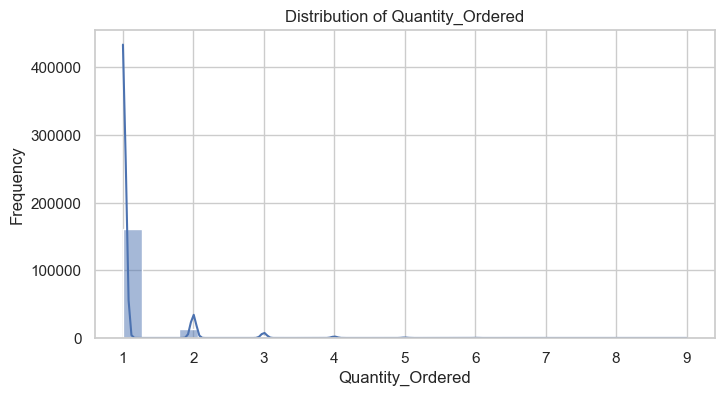


Univariate Analysis for Price_Each:
count    178437.000000
mean        187.611323
std         335.317522
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        1700.000000
Name: Price_Each, dtype: float64


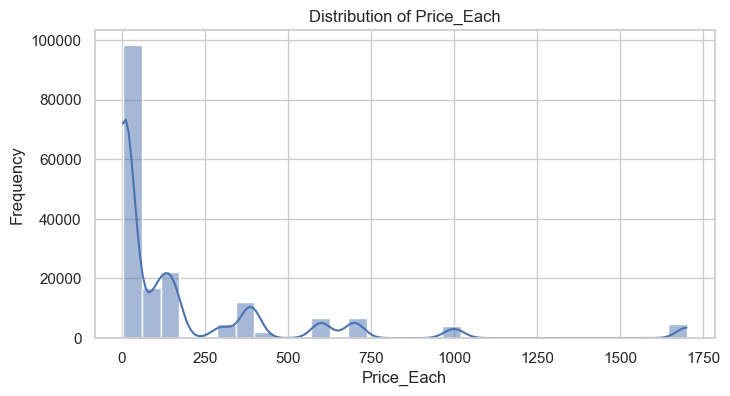


Univariate Analysis for Sales:
count    178437.000000
mean        188.703013
std         335.513390
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        3400.000000
Name: Sales, dtype: float64


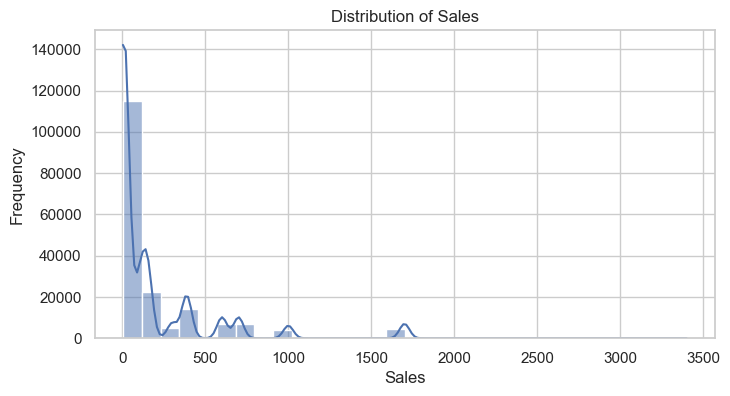


Univariate Analysis for Month:
count     178437
unique        12
top          Dec
freq       24004
Name: Month, dtype: object


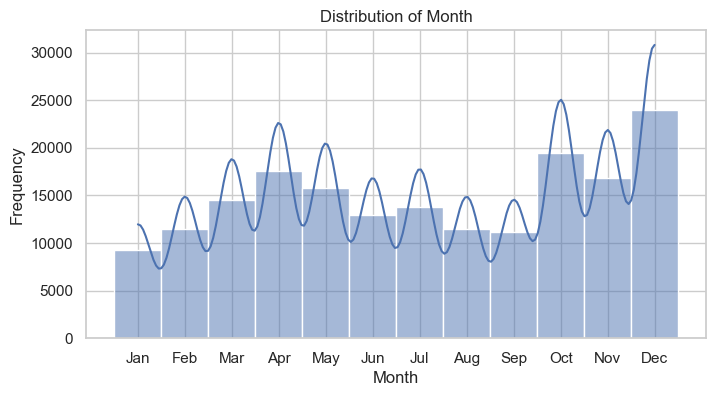

In [28]:
# Set plot style
sns.set(style="whitegrid")

# List of numeric columns (excluding 'Order_ID')
numeric_columns = ['Quantity_Ordered', 'Price_Each', 'Sales', 'Month']

# Univariate analysis for each numeric column
for col in numeric_columns:
    print(f"\nUnivariate Analysis for {col}:")

    # Display basic statistics
    print(df_combined[col].describe())

    # Create a histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(df_combined[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#### **Bivariate Analysis**


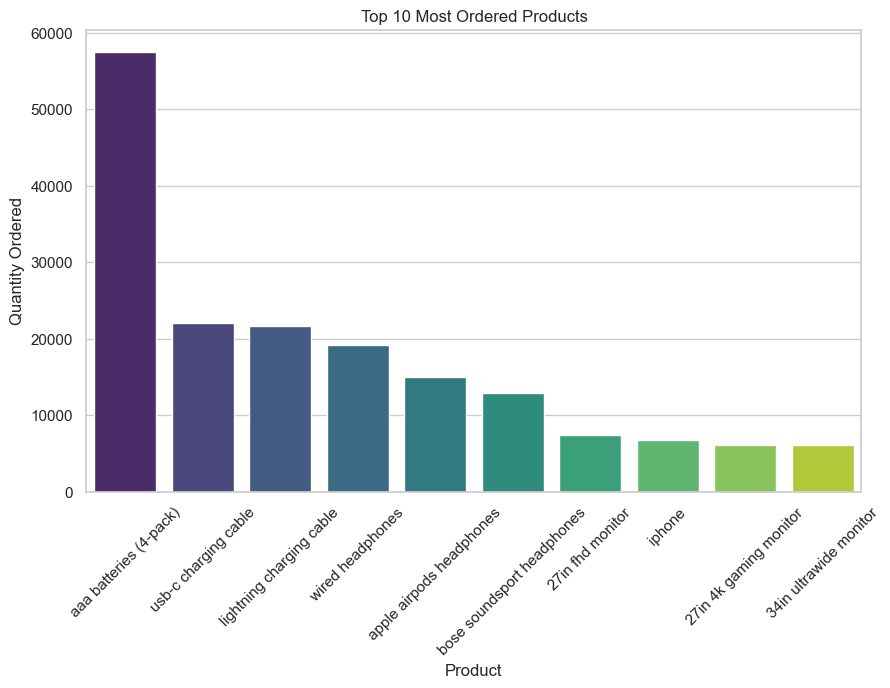

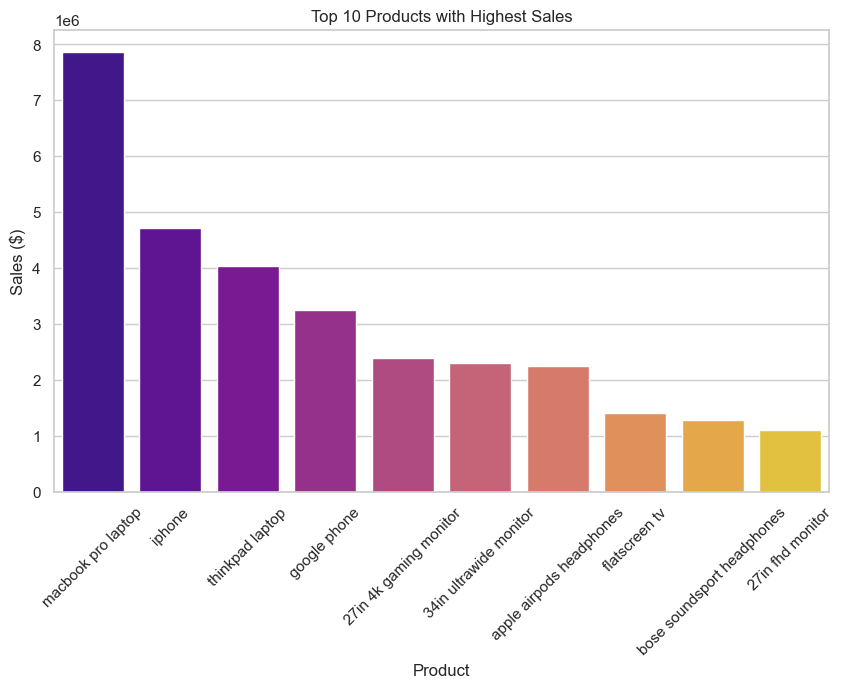

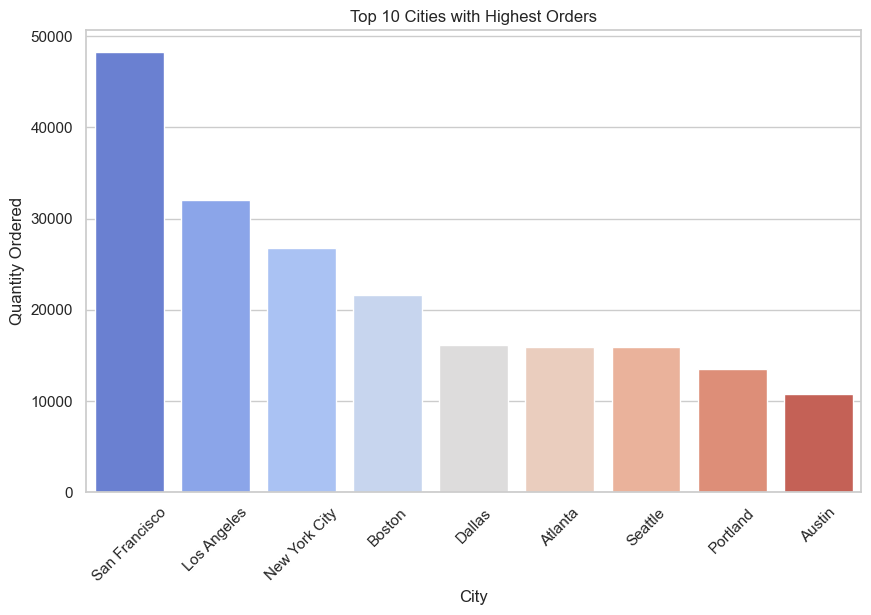

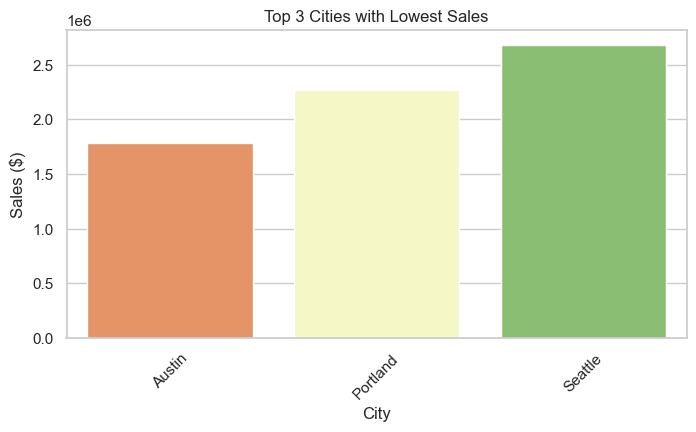

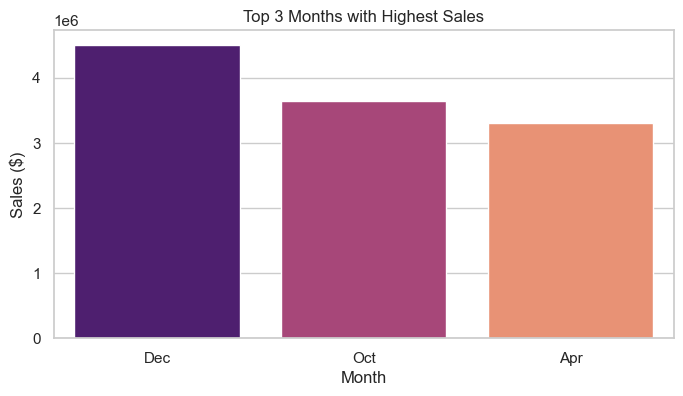

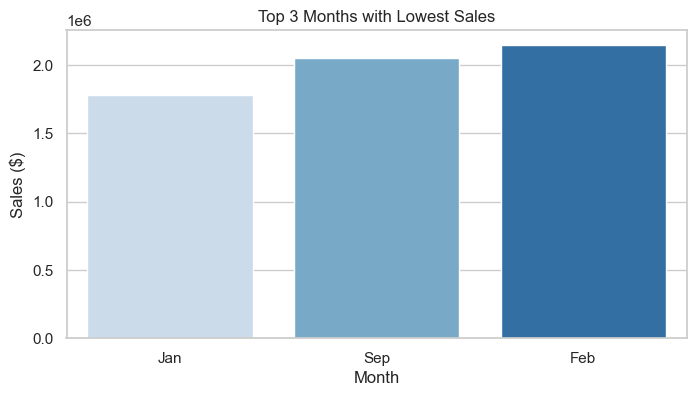

In [29]:

# Set plot style
sns.set(style="whitegrid")

# Bivariate Analysis - Most ordered product
most_ordered_products = df_combined.groupby(
    'Product')['Quantity_Ordered'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=most_ordered_products.index[:10],
            y=most_ordered_products.values[:10], palette="viridis")
plt.title('Top 10 Most Ordered Products')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

# Top 10 products with the highest sales
top_sales_products = df_combined.groupby(
    'Product')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_sales_products.index[:10],
            y=top_sales_products.values[:10], palette="plasma")
plt.title('Top 10 Products with Highest Sales')
plt.xlabel('Product')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.show()

# Top 10 cities with the highest orders
top_cities_orders = df_combined.groupby(
    'City')['Quantity_Ordered'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities_orders.index[:10],
            y=top_cities_orders.values[:10], palette="coolwarm")
plt.title('Top 10 Cities with Highest Orders')
plt.xlabel('City')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

# Top 3 cities with the lowest sales
lowest_sales_cities = df_combined.groupby(
    'City')['Sales'].sum().sort_values().head(3)

plt.figure(figsize=(8, 4))
sns.barplot(x=lowest_sales_cities.index,
            y=lowest_sales_cities.values, palette="RdYlGn")
plt.title('Top 3 Cities with Lowest Sales')
plt.xlabel('City')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.show()

# Top 3 months with the highest sales
top_sales_months = df_combined.groupby(
    'Month')['Sales'].sum().sort_values(ascending=False).head(3)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_sales_months.index,
            y=top_sales_months.values, palette="magma")
plt.title('Top 3 Months with Highest Sales')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.show()

# Top 3 months with the lowest sales
lowest_sales_months = df_combined.groupby(
    'Month')['Sales'].sum().sort_values().head(3)

plt.figure(figsize=(8, 4))
sns.barplot(x=lowest_sales_months.index,
            y=lowest_sales_months.values, palette="Blues")
plt.title('Top 3 Months with Lowest Sales')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.show()

### **Business Questions**


1. How much money did we make this year?


In [30]:
# Create a new column 'Total_Sales' (Price * Quantity Ordered) with 2 decimal precision
df_combined['Total_Sales'] = (
    df_combined['Price_Each'] * df_combined['Quantity_Ordered']).round(2)

# Calculate total revenue for the year, rounding the sum to 2 decimal places
total_revenue = round(df_combined['Total_Sales'].sum(), 2)
print(f"Total Revenue in 2019: ${total_revenue:,.2f}")

Total Revenue in 2019: $33,671,599.47


The total revenue generated in 2019 Thirty-three million, six hundred seventy-one thousand, five hundred ninety-nine dollars and forty-seven cents


2. Can we identify any seasonality in the sales?


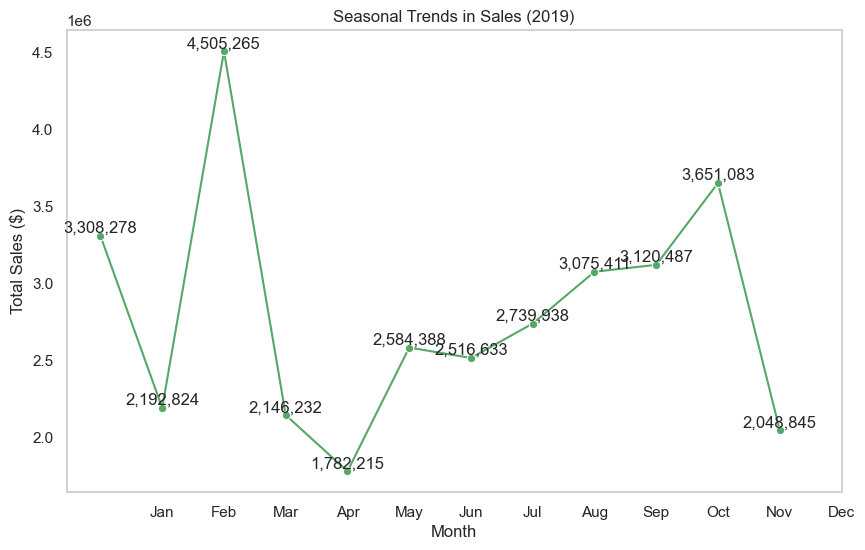

In [31]:
# Group by month to calculate total sales for each month
monthly_sales = df_combined.groupby('Month')['Sales'].sum()

# Plot monthly sales to observe seasonal trends
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index,
             y=monthly_sales.values, marker='o', color='g')

# Annotate each point with its value
for x, y in zip(monthly_sales.index, monthly_sales.values):
    # Format the labels with commas and no decimal places
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom')

# Set the title and labels for the plot
plt.title('Seasonal Trends in Sales (2019)')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(ticks=range(1, 13), labels=[
           'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(False)

# Show the plot
plt.show()

The graph shows a distinct fluctuations in monthly sales. From January to April, sales steadily increase, starting at $1.78 million in January and reaching a peak of $3.31 million in April. However, after April, sales begin to decline, dropping consistently until they hit the lowest point of $2.05 million in September. Following this, there is a sharp rebound in October, with sales surging and reaching the highest figure of $4.51 million in December. This pattern suggests strong seasonality, with sales peaking toward the end of the year, likely due to holiday shopping, while the summer months experience a noticeable dip, possibly reflecting a slower sales period.


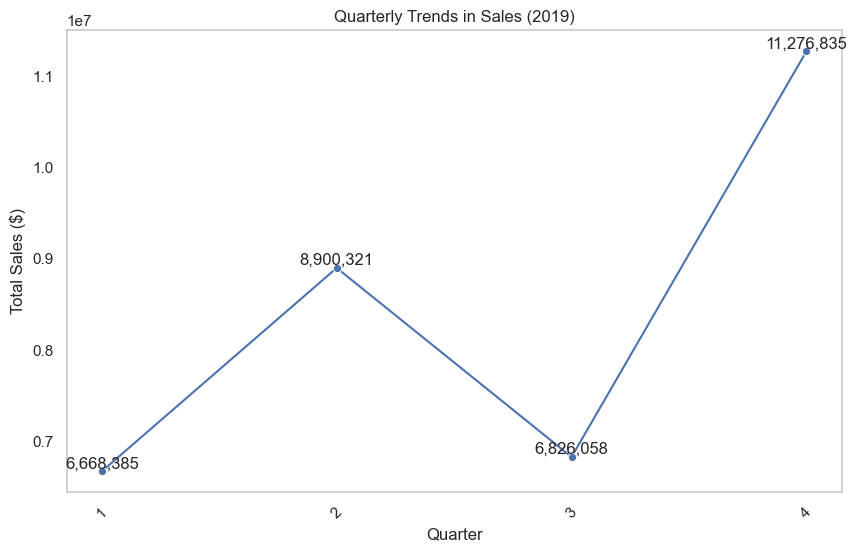

In [32]:
# Group by quarter to calculate total sales for each quarter
quarterly_sales = df_combined.groupby('Quarter')['Sales'].sum()

# Plot quarterly sales to observe trends
plt.figure(figsize=(10, 6))
sns.lineplot(x=quarterly_sales.index.astype(str),
             y=quarterly_sales.values, marker='o', color='b')

# Annotate each point with its value
for x, y in zip(quarterly_sales.index.astype(str), quarterly_sales.values):
    # Format the labels with commas and no decimal places
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom')

# Set the title and labels for the plot
plt.title('Quarterly Trends in Sales (2019)')
plt.xlabel('Quarter')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(False)

# Show the plot
plt.show()

3. What are our best and worst-selling products?


Best performing product:
Product
macbook pro laptop    7867600.0
Name: Sales, dtype: float64

Worst performing product:
Product
aaa batteries (4-pack)    195014.52
Name: Sales, dtype: float64


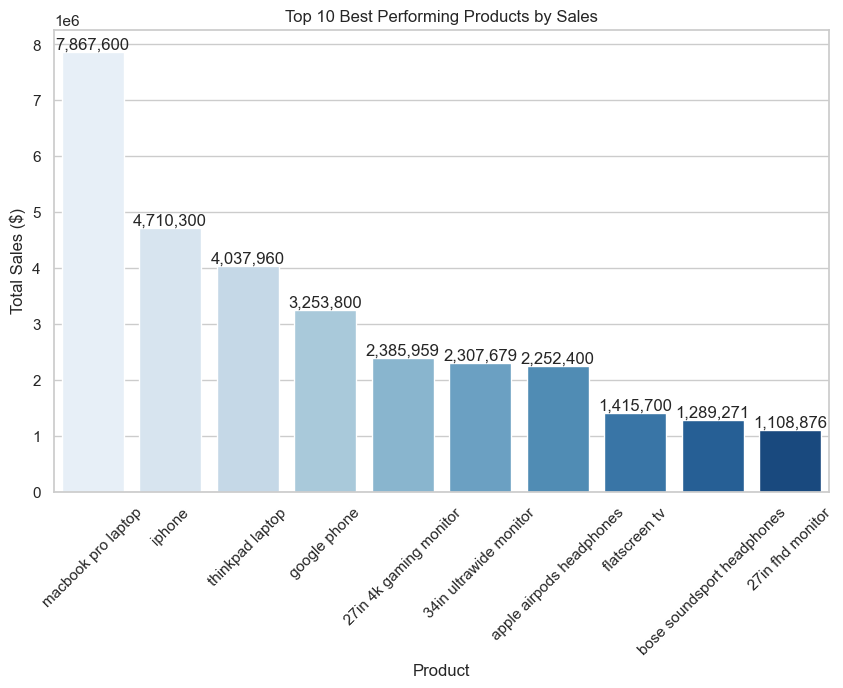

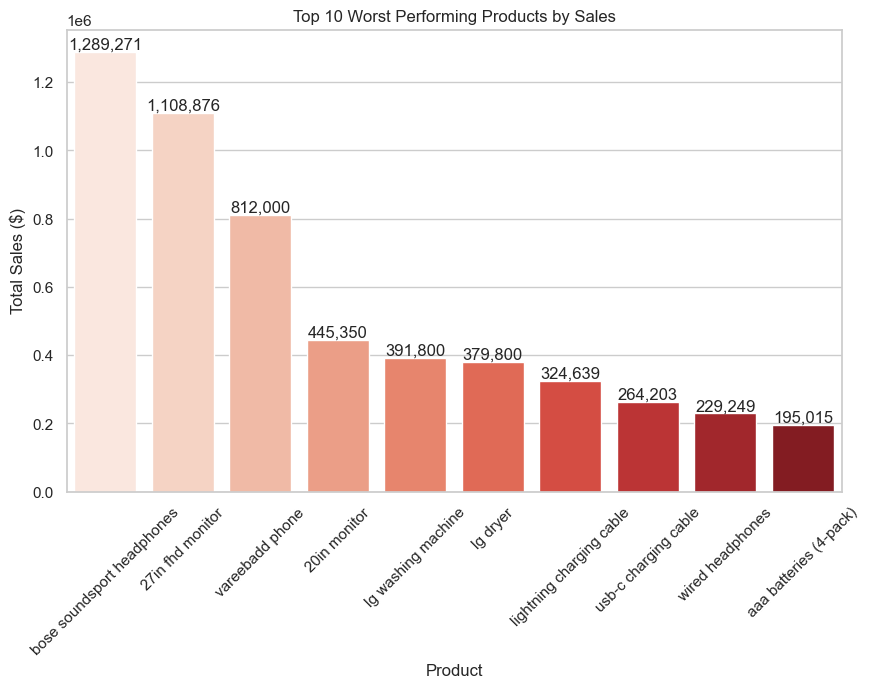

In [33]:
# Best performing products by sales
best_products = df_combined.groupby(
    'Product')['Sales'].sum().sort_values(ascending=False)

print("Best performing product:")
print(best_products.head(1))

print("\nWorst performing product:")
print(best_products.tail(1))

# Visualize top 10 best performing products by sales with labels
plt.figure(figsize=(10, 6))
sns.barplot(x=best_products.index[:10],
            y=best_products.values[:10], palette="Blues")

# Add labels on each bar
for x, y in enumerate(best_products.values[:10]):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom')

plt.title('Top 10 Best Performing Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()

# Visualize top 10 worst performing products by sales with labels
plt.figure(figsize=(10, 6))
sns.barplot(x=best_products.index[-10:],
            y=best_products.values[-10:], palette="Reds")

# Add labels on each bar
for x, y in enumerate(best_products.values[-10:]):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom')

plt.title('Top 10 Worst Performing Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()

(np.float64(-1.0999993607883731),
 np.float64(1.099998229243383),
 np.float64(-1.0999998974389567),
 np.float64(1.0999999951161408))

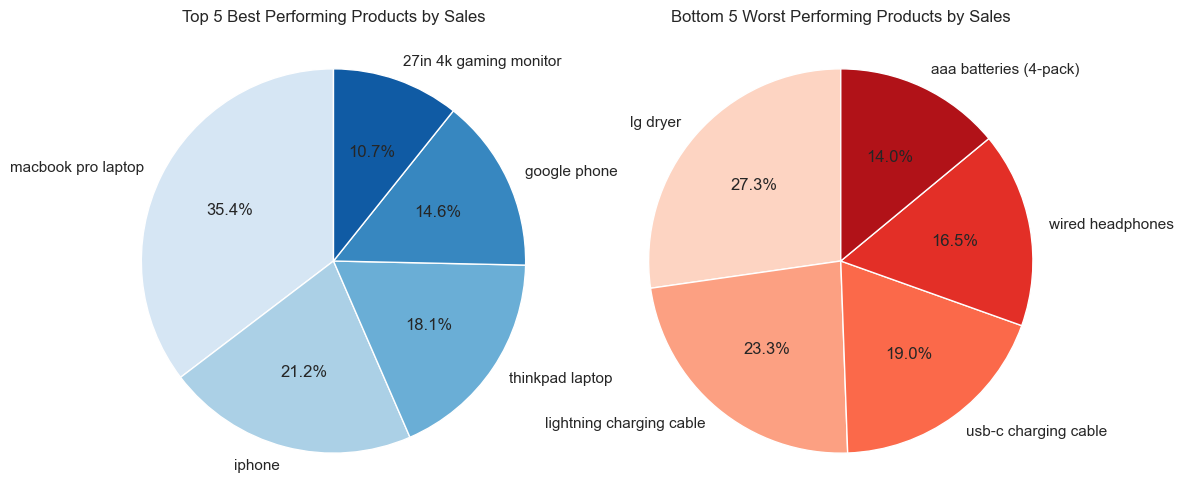

In [34]:
# Best performing products by sales
best_products = df_combined.groupby(
    'Product')['Sales'].sum().sort_values(ascending=False)

# Get the top 5 and bottom 5 performing products
top_5_products = best_products.head(5)
bottom_5_products = best_products.tail(5)

# Plot pie chart for the top 5 best performing products
plt.figure(figsize=(12, 6))

# Plot for top 5 products
plt.subplot(1, 2, 1)
plt.pie(top_5_products, labels=top_5_products.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('Blues', len(top_5_products)))
plt.title('Top 5 Best Performing Products by Sales')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot for bottom 5 products
plt.subplot(1, 2, 2)
plt.pie(bottom_5_products, labels=bottom_5_products.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('Reds', len(bottom_5_products)))
plt.title('Bottom 5 Worst Performing Products by Sales')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn

4. How do sales compare to previous months or weeks?


[ 1  2  3  4  5  6  7  8  9 10 11 12]


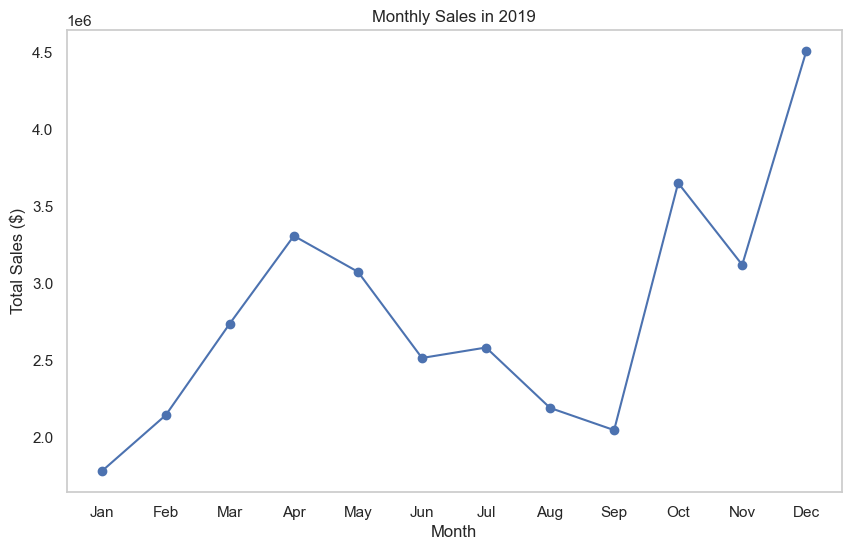

Total Monthly Sales:
Month
1     1782214.90
2     2146232.20
3     2739938.02
4     3308277.50
5     3075410.70
6     2516633.11
7     2584388.35
8     2192824.44
9     2048845.16
10    3651082.99
11    3120487.12
12    4505264.98
Name: Sales, dtype: float64


In [47]:
# Create a mapping from month abbreviations to numbers
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Replace the month abbreviations with numbers
df_combined['Month'] = df_combined['Month'].map(month_mapping)

# Ensure that the 'Month' column is now in integer format
print(df_combined['Month'].unique())  # This should now show integers from 1 to 12

# Group sales by month again
monthly_sales = df_combined.groupby('Month')['Sales'].sum()

# Plot monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales in 2019')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(False)

# Set x-axis ticks and labels for months
plt.xticks(ticks=range(1, 13), labels=[
           'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

# Print total monthly sales for review
print("Total Monthly Sales:")
print(monthly_sales)


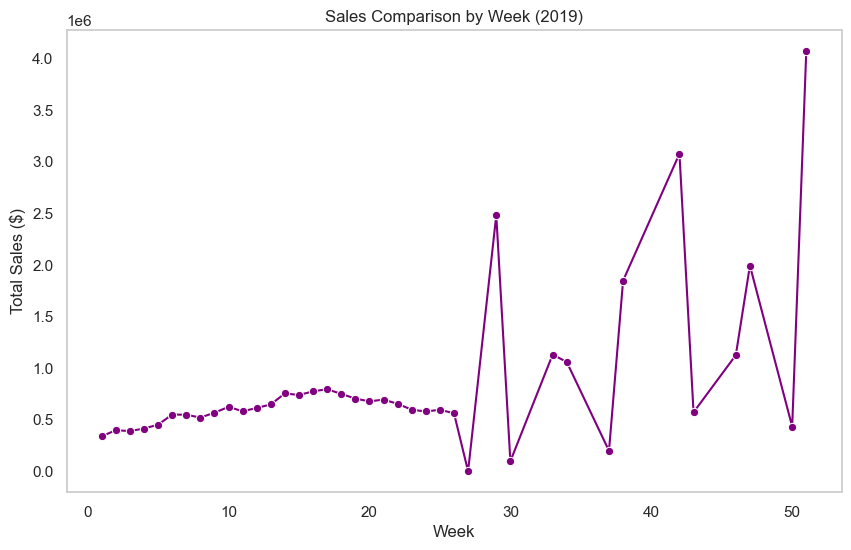

In [48]:
# Group by week and calculate sales
weekly_sales = df_combined.groupby('Week')['Sales'].sum()

# Plot weekly sales
plt.figure(figsize=(10, 6))
sns.lineplot(x=weekly_sales.index, y=weekly_sales.values,
             marker='o', color='purple')
plt.title('Sales Comparison by Week (2019)')
plt.xlabel('Week')
plt.ylabel('Total Sales ($)')
plt.grid(False)
plt.show()

5. Which cities are our products delivered to most?


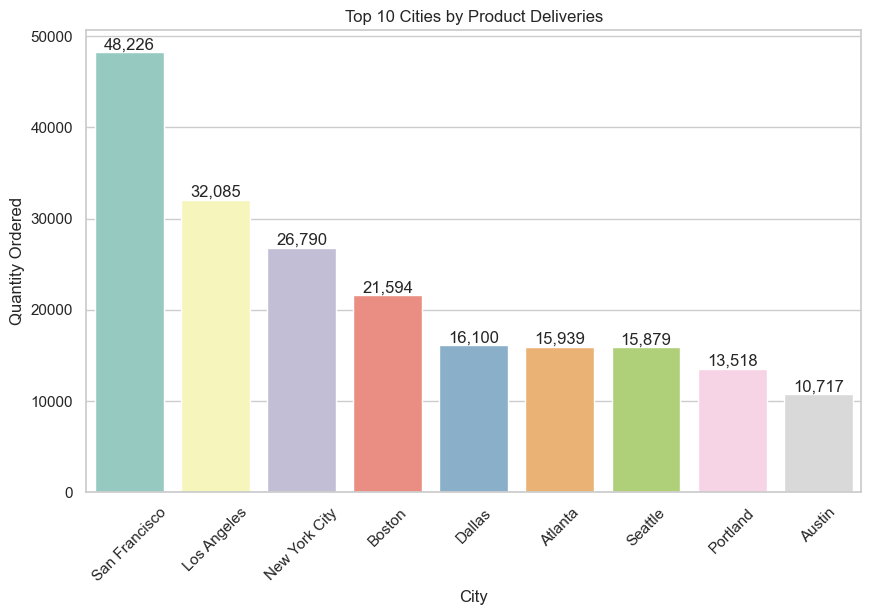

In [36]:
# Group by city and calculate the total quantity ordered
city_deliveries = df_combined.groupby(
    'City')['Quantity_Ordered'].sum().sort_values(ascending=False)

# Plot top 10 cities by deliveries with labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=city_deliveries.index[:10], y=city_deliveries.values[:10], palette="Set3")

# Annotate each bar with its value
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height,
            f'{height:,.0f}', ha='center', va='bottom')

plt.title('Top 10 Cities by Product Deliveries')
plt.xlabel('City')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

6. How do product categories compare in revenue generated and quantities ordered?


#### create categories for each products


In [37]:
# Define the product-category mapping
product_category_map = {
    'iphone': 'Mobile Phones',
    'lightning charging cable': 'Accessories',
    'wired headphones': 'Accessories',
    '27in fhd monitor': 'Electronics',
    'aaa batteries (4-pack)': 'Accessories',
    '27in 4k gaming monitor': 'Electronics',
    'usb-c charging cable': 'Accessories',
    'bose soundsport headphones': 'Accessories',
    'apple airpods headphones': 'Accessories',
    'macbook pro laptop': 'Electronics',
    'flatscreen tv': 'Home Appliances',
    'vareebadd phone': 'Mobile Phones',
    'aa batteries (4-pack)': 'Accessories',
    'google phone': 'Mobile Phones',
    '20in monitor': 'Electronics',
    '34in ultrawide monitor': 'Electronics',
    'thinkpad laptop': 'Electronics',
    'lg dryer': 'Home Appliances',
    'lg washing machine': 'Home Appliances'
}

# Map the 'Product' column to its category
df_combined['Product_Category'] = df_combined['Product'].str.lower().map(
    product_category_map)

# Insert the 'Category' column next to the 'Product' column
df_combined.insert(df_combined.columns.get_loc('Product') + 1,
                   'Product_Category', df_combined.pop('Product_Category'))

# Display the first few rows to verify
df_combined.head()

,Order_ID,Product,Product_Category,Quantity_Ordered,Price_Each,Price_Level,Sales,Order_Date,Purchase_Address,Month,Week,Quarter,City,Total_Sales
0,141234,iphone,Mobile Phones,1,700.00,High-Level,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Jan,4,1,Boston,700.00
1,141235,lightning charging cable,Accessories,1,14.95,Basic-Level,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Jan,5,1,Portland,14.95
2,141236,wired headphones,Accessories,2,11.99,Basic-Level,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",Jan,3,1,San Francisco,23.98
3,141237,27in fhd monitor,Electronics,1,149.99,High-Level,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Jan,1,1,Los Angeles,149.99
4,141238,wired headphones,Accessories,1,11.99,Basic-Level,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Jan,4,1,Austin,11.99


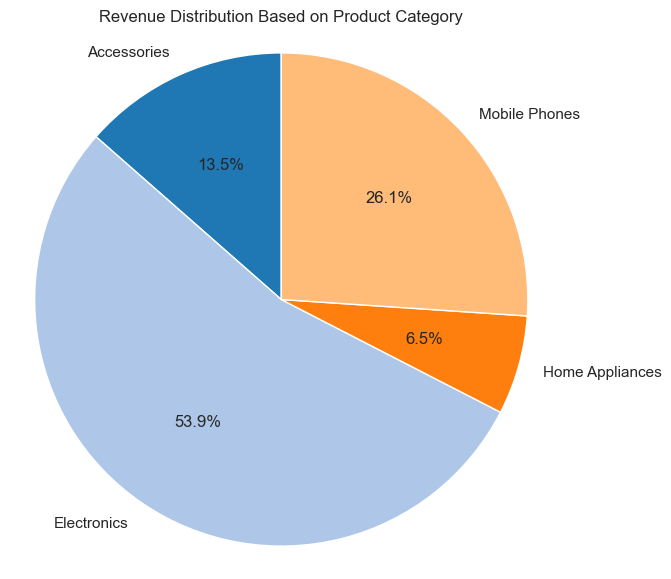

In [38]:
# Group by 'Product_Category' and sum the sales to get total revenue for each category
revenue_by_product_categories = df_combined.groupby("Product_Category")[
    "Sales"].sum()

# Generate a color palette with the same number of colors as product categories
colors = plt.get_cmap('tab20')(range(len(revenue_by_product_categories)))

# Plot a pie chart
plt.figure(figsize=(7, 7))
plt.pie(revenue_by_product_categories,
        labels=revenue_by_product_categories.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors)

# Add a title
plt.title('Revenue Distribution Based on Product Category')

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

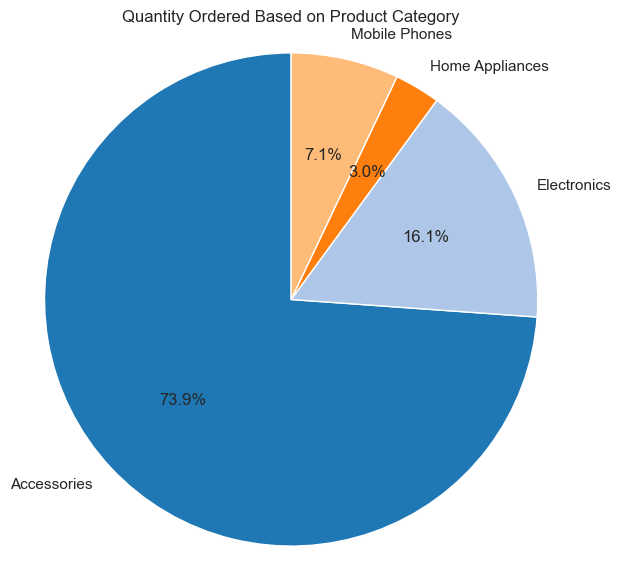

In [39]:
# Group by 'Product_Category' and sum the sales to get total revenue for each category
quantity_by_product_categories = df_combined.groupby(
    "Product_Category")["Quantity_Ordered"].sum()

# Generate a color palette with the same number of colors as product categories
colors = plt.get_cmap('tab20')(range(len(quantity_by_product_categories)))

# Plot a pie chart
plt.figure(figsize=(7, 7))
plt.pie(quantity_by_product_categories,
        labels=quantity_by_product_categories.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors)

# Add a title
plt.title('Quantity Ordered Based on Product Category')

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

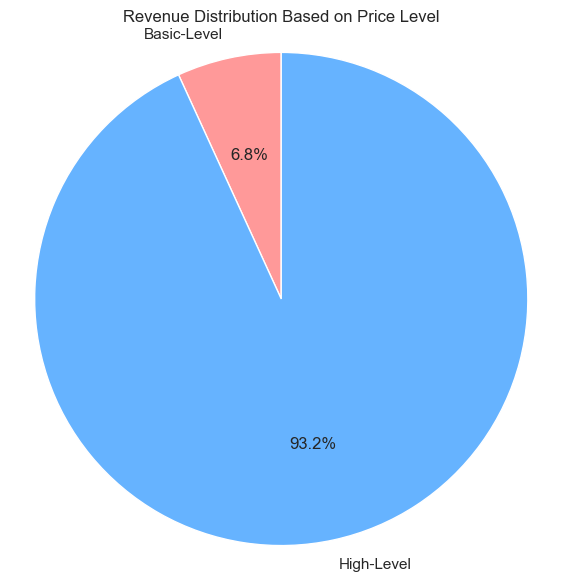

In [40]:
# Step 1: Group by 'Price_Level' and sum the 'Sales' to get total revenue for each price level
quantity_by_price_level = df_combined.groupby('Price_Level')['Sales'].sum()

# Step 2: Plot a pie chart
plt.figure(figsize=(7, 7))
plt.pie(quantity_by_price_level,
        labels=quantity_by_price_level.index,
        autopct='%1.1f%%',
        startangle=90,
        # Add more colors
        colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])

# Step 3: Add a title
plt.title('Revenue Distribution Based on Price Level')

# Step 4: Display the chart
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()

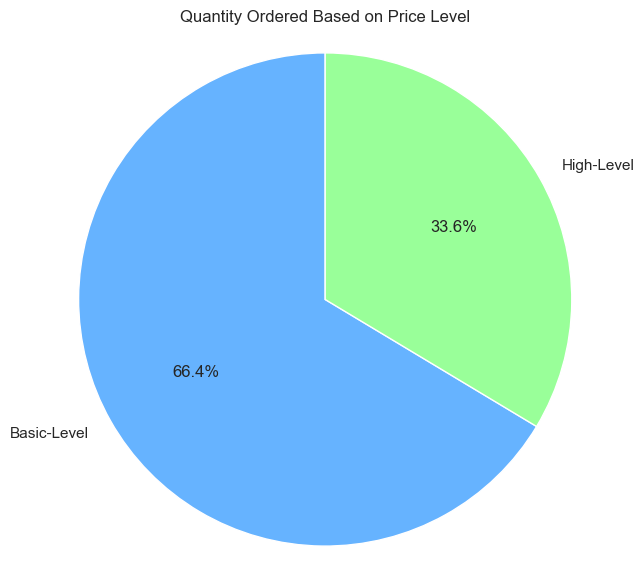

In [41]:
# Group by 'Price_Level' and sum up the 'Quantity_Ordered' to get total quantities for each price level
quantity_by_price_level = df_combined.groupby(
    'Price_Level')['Quantity_Ordered'].sum()

# Plot a pie chart
plt.figure(figsize=(7, 7))
plt.pie(quantity_by_price_level, labels=quantity_by_price_level.index,
        autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])

# title
plt.title('Quantity Ordered Based on Price Level')

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [42]:
# Convert the DataFrame to a CSV file
df_combined.to_csv('transactional_data.csv', index=False)

### **Deployment**


Insights derrived are deployed on a Power BI dashboard to visualize the insights
